# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
auto = pd.read_csv('/content/drive/MyDrive/Dataset/autos.csv')
auto

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,privat,Angebot,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,1500
1,privat,Angebot,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,3600
2,privat,Angebot,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,650
3,privat,Angebot,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2200
4,privat,Angebot,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249171,privat,Angebot,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,3200
249172,privat,Angebot,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,1150
249173,privat,Angebot,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,1199
249174,privat,Angebot,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,9200


In [4]:
auto.head() # to view top 5 rows of a dataset

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,privat,Angebot,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,1500
1,privat,Angebot,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,3600
2,privat,Angebot,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,650
3,privat,Angebot,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2200
4,privat,Angebot,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,0


In [5]:
auto.tail() # to view last 5 rows of a dataset

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
249171,privat,Angebot,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,3200
249172,privat,Angebot,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,1150
249173,privat,Angebot,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,1199
249174,privat,Angebot,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,9200
249175,privat,Angebot,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,28990


# Data Cleaning

In [6]:
print('Shape of the data:{}'.format(auto.shape))

Shape of the data:(249176, 13)


In [7]:
columnsname = auto.columns
columnsname

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [8]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249176 entries, 0 to 249175
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seller               249176 non-null  object
 1   offerType            249176 non-null  object
 2   vehicleType          249176 non-null  object
 3   yearOfRegistration   249176 non-null  int64 
 4   gearbox              249176 non-null  object
 5   powerPS              249176 non-null  int64 
 6   model                249176 non-null  object
 7   kilometer            249176 non-null  int64 
 8   monthOfRegistration  249176 non-null  int64 
 9   fuelType             249176 non-null  object
 10  brand                249176 non-null  object
 11  notRepairedDamage    249176 non-null  object
 12  price                249176 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 24.7+ MB


In [9]:
auto.isnull().sum()

seller                 0
offerType              0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
price                  0
dtype: int64

In [10]:
auto.replace({'nein':'No','ja':'Yes'},inplace=True)
auto.replace({'benzin':'Petrol','diesel':'Diesel','lpg':'LPG','cng':'CNG','hybrid':'Hybrid','elektro':'Electric','andere':'Others'},inplace=True)
auto.replace({'manuell':'Manual', 'automatik':'Automatic'}, inplace=True)

In [11]:
Duplicate = auto[auto.duplicated()]
Duplicate

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
2622,privat,Angebot,limousine,1999,Manual,75,golf,150000,8,Petrol,volkswagen,No,1670
2793,privat,Angebot,limousine,2002,Manual,101,golf,150000,6,Diesel,volkswagen,No,2999
2880,privat,Angebot,kleinwagen,1999,Manual,55,corsa,150000,12,Petrol,opel,No,500
3051,privat,Angebot,limousine,2014,Manual,150,golf,20000,9,Diesel,volkswagen,No,18750
3116,privat,Angebot,kombi,2007,Manual,140,a6,100000,3,Diesel,audi,No,14500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249147,privat,Angebot,cabrio,1991,Manual,211,Others,150000,7,Petrol,porsche,No,12800
249152,privat,Angebot,kombi,2012,Manual,156,accord,125000,10,Petrol,honda,No,13850
249164,privat,Angebot,limousine,2003,Automatic,145,e_klasse,150000,3,Diesel,mercedes_benz,No,6500
249167,privat,Angebot,limousine,2008,Manual,105,leon,150000,7,Diesel,seat,No,4400


In [12]:
Duplicate.shape

(20133, 13)

In [13]:
Duplicate['brand'].value_counts()

volkswagen       4811
bmw              2494
opel             2300
audi             1889
mercedes_benz    1835
ford             1332
renault           872
peugeot           638
fiat              469
seat              384
skoda             327
nissan            237
smart             235
mazda             234
mini              216
toyota            205
citroen           196
volvo             196
hyundai           191
kia               156
mitsubishi        105
alfa_romeo        104
suzuki            104
porsche            95
honda              79
chevrolet          67
dacia              51
chrysler           50
land_rover         41
daihatsu           41
saab               30
jeep               29
subaru             27
jaguar             23
lancia             23
daewoo             16
rover              12
trabant            10
lada                9
Name: brand, dtype: int64

In [14]:
auto.drop_duplicates(inplace=True)

In [15]:
auto.shape

(229043, 13)

In [16]:
from datetime import date

# current_year = date.today().year
# print(current_year)
#auto['Current Year']= date.today().year
auto['Age']= date.today().year - auto['yearOfRegistration']


In [17]:
auto.head()

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,privat,Angebot,kleinwagen,2001,Manual,75,golf,150000,6,Petrol,volkswagen,No,1500,21
1,privat,Angebot,kleinwagen,2008,Manual,69,fabia,90000,7,Diesel,skoda,No,3600,14
2,privat,Angebot,limousine,1995,Manual,102,3er,150000,10,Petrol,bmw,Yes,650,27
3,privat,Angebot,cabrio,2004,Manual,109,2_reihe,150000,8,Petrol,peugeot,No,2200,18
4,privat,Angebot,limousine,1980,Manual,50,Others,40000,7,Petrol,volkswagen,No,0,42


In [18]:
auto['vehicleType'].value_counts()

limousine     66902
kleinwagen    51665
kombi         46752
bus           22147
cabrio        16363
coupe         12997
suv           10581
Others         1636
Name: vehicleType, dtype: int64

In [19]:
suv = auto[(auto['vehicleType']=='suv')]

In [20]:
suv['brand'].value_counts()

volkswagen       1295
mercedes_benz    1272
bmw               734
hyundai           713
nissan            602
suzuki            578
jeep              558
land_rover        558
ford              537
kia               503
toyota            399
porsche           334
audi              323
opel              319
mitsubishi        302
chevrolet         295
volvo             206
honda             175
skoda             166
dacia             162
mazda             157
lada               82
renault            66
mini               49
subaru             47
peugeot            40
daihatsu           32
citroen            26
fiat               25
chrysler           13
rover               5
saab                4
seat                3
trabant             1
Name: brand, dtype: int64

In [21]:
df = suv[suv['brand'].isin(['mercedes_benz','bmw','ford'])]
df

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
89,privat,Angebot,suv,2014,Automatic,204,glk,40000,9,Diesel,mercedes_benz,No,41900,8
182,privat,Angebot,suv,2009,Automatic,224,m_klasse,150000,12,Diesel,mercedes_benz,No,27500,13
261,privat,Angebot,suv,2007,Automatic,510,m_klasse,150000,4,LPG,mercedes_benz,No,21500,15
432,privat,Angebot,suv,2009,Automatic,224,glk,90000,8,Diesel,mercedes_benz,No,21500,13
636,privat,Angebot,suv,2014,Manual,163,kuga,30000,7,Diesel,ford,No,25950,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248254,privat,Angebot,suv,2007,Automatic,218,x_reihe,150000,4,Diesel,bmw,No,12000,15
248601,privat,Angebot,suv,2005,Manual,218,x_reihe,150000,12,Diesel,bmw,No,9900,17
249033,privat,Angebot,suv,2008,Automatic,235,x_reihe,100000,1,Diesel,bmw,No,23500,14
249068,privat,Angebot,suv,2012,Automatic,300,m_klasse,100000,3,Diesel,mercedes_benz,No,44900,10


In [22]:
df.reset_index(inplace=True)

In [23]:
df.drop(['index'],axis=1,inplace=True)

In [24]:
df['seller'].value_counts()

privat    2543
Name: seller, dtype: int64

In [25]:
df['offerType'].value_counts()

Angebot    2543
Name: offerType, dtype: int64

In [26]:
df.drop(['seller','offerType'],axis=1,inplace=True)

In [27]:
df

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Automatic,204,glk,40000,9,Diesel,mercedes_benz,No,41900,8
1,suv,2009,Automatic,224,m_klasse,150000,12,Diesel,mercedes_benz,No,27500,13
2,suv,2007,Automatic,510,m_klasse,150000,4,LPG,mercedes_benz,No,21500,15
3,suv,2009,Automatic,224,glk,90000,8,Diesel,mercedes_benz,No,21500,13
4,suv,2014,Manual,163,kuga,30000,7,Diesel,ford,No,25950,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2538,suv,2007,Automatic,218,x_reihe,150000,4,Diesel,bmw,No,12000,15
2539,suv,2005,Manual,218,x_reihe,150000,12,Diesel,bmw,No,9900,17
2540,suv,2008,Automatic,235,x_reihe,100000,1,Diesel,bmw,No,23500,14
2541,suv,2012,Automatic,300,m_klasse,100000,3,Diesel,mercedes_benz,No,44900,10


In [28]:
df.select_dtypes(exclude='object').columns

Index(['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration',
       'price', 'Age'],
      dtype='object')

# Statistical Section

In [29]:
df.describe()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price,Age
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,2005.997247,198.171058,120308.690523,6.526937,16603.505702,16.002753
std,6.499197,70.380780,43617.330835,3.495074,12430.437892,6.499197
min,1910.000000,0.000000,5000.000000,0.000000,0.000000,6.000000
25%,2003.000000,160.000000,90000.000000,4.000000,7849.500000,12.000000
50%,2007.000000,197.000000,150000.000000,7.000000,14500.000000,15.000000
75%,2010.000000,231.000000,150000.000000,10.000000,22000.000000,19.000000
max,2016.000000,585.000000,150000.000000,12.000000,127500.000000,112.000000


In [30]:
df[df['price']==df['price'].max()]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
996,suv,2016,Automatic,585,s_klasse,5000,2,Petrol,mercedes_benz,No,127500,6


In [31]:
df.columns

Index(['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'price', 'Age'],
      dtype='object')

In [32]:
pd.pivot_table(df,index=['vehicleType', 'brand'],
               values = ['price','Age','powerPS'],
               aggfunc=[np.mean,len,np.std], margins=True)

mean                             len          \
                                 Age     powerPS         price   Age powerPS   
vehicleType brand                                                              
suv         bmw            14.529973  206.551771  17357.282016   734     734   
            ford           16.404097  162.610801  12252.726257   537     537   
            mercedes_benz  16.683176  208.347484  18005.311321  1272    1272   
All                        16.002753  198.171058  16603.505702  2543    2543   

                                      std                           
                          price       Age    powerPS         price  
vehicleType brand                                                   
suv         bmw             734  3.578555  66.897955  10995.513382  
            ford            537  8.901546  52.972741   8196.577961  
            mercedes_benz  1272  6.472560  73.919430  14166.212316  
All                        2543  6.497919  70.366941  12427.993602

In [33]:
suv[suv['brand']=='bmw']['Age'].mean()

14.529972752043596

In [34]:
pd.pivot_table(df,index=['brand','fuelType'],
               values=['kilometer','price','Age'],
               aggfunc=[np.mean],margins=True)

mean                             
                              Age      kilometer         price
brand         fuelType                                        
bmw           Diesel    14.181965  123365.539452  18022.827697
              Hybrid    12.000000   65000.000000  43374.500000
              LPG       19.750000  148750.000000   7766.250000
              Petrol    15.813187  116538.461538  14351.593407
ford          Diesel    12.134483   89689.655172  15680.475862
              LPG       23.416667  140000.000000   4582.083333
              Petrol    21.075829  110521.327014   8850.336493
mercedes_benz Diesel    15.790061  126622.718053  18832.016227
              LPG       22.629630  145277.777778   8224.555556
              Petrol    19.094828  123103.448276  16768.370690
All                     16.002753  120308.690523  16603.505702

# EDA

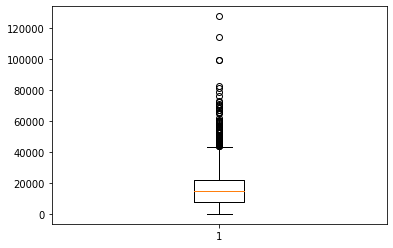

In [35]:
plt.boxplot([df['price']])
plt.show()

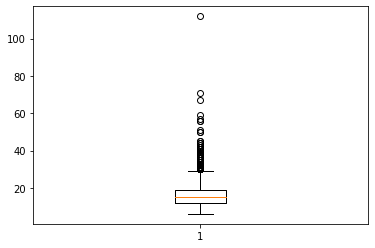

In [36]:
plt.boxplot([df['Age']])
plt.show()

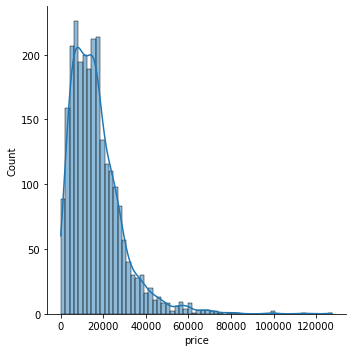

In [37]:
sns.displot(x=df['price'],kde=True)
plt.show()

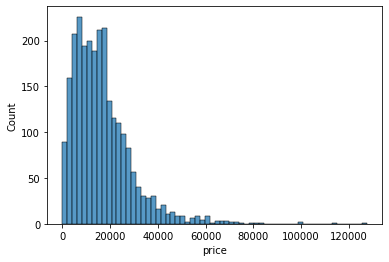

In [38]:
sns.histplot(x='price', data=df);

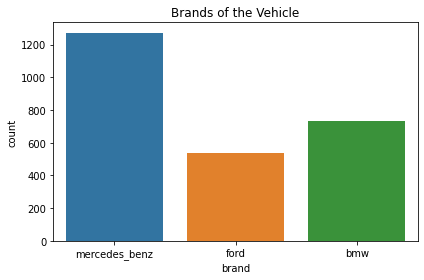

In [39]:
sns.countplot(x='brand',data=df)
plt.title('Brands of the Vehicle')
plt.tight_layout();

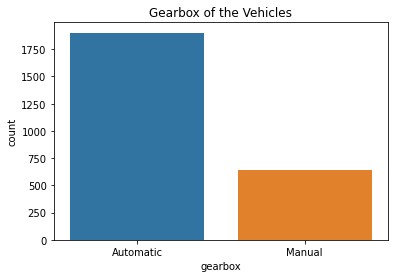

In [40]:
sns.countplot(x=df['gearbox'])
plt.title('Gearbox of the Vehicles')
plt.show()

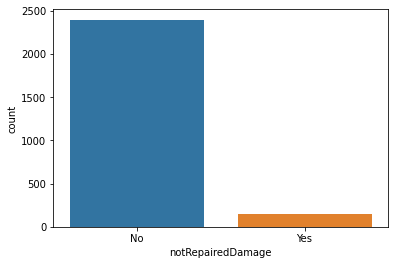

In [41]:
sns.countplot(x=df['notRepairedDamage'])
plt.show()

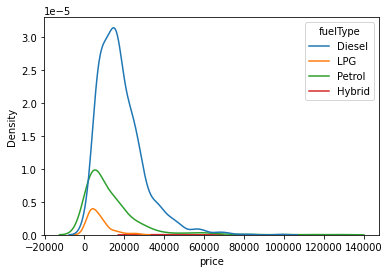

In [42]:
sns.kdeplot(x='price', data=df, hue='fuelType')
plt.show()

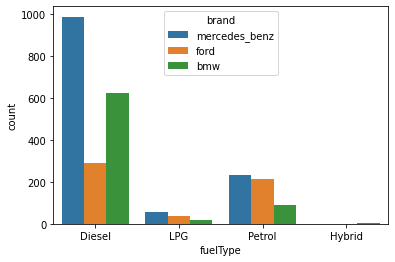

In [43]:
sns.countplot(x='fuelType',hue='brand', data=df);

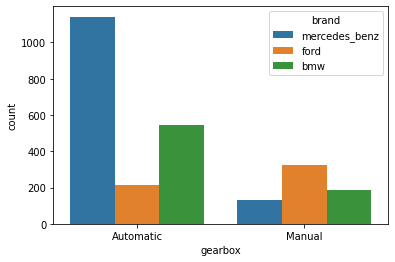

In [44]:
sns.countplot(x='gearbox', hue='brand', data=df);

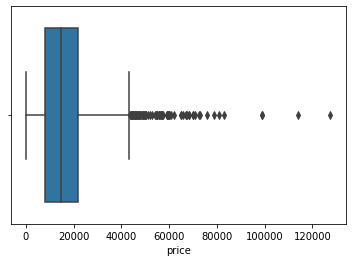

In [45]:
sns.boxplot(x=df[ 'price'])
plt.show()

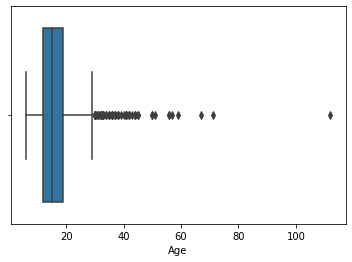

In [46]:
sns.boxplot(x=df['Age'])
plt.show()

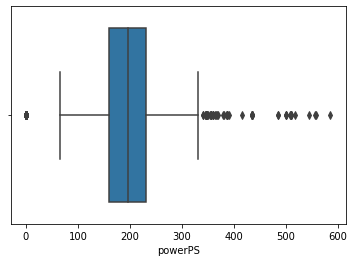

In [47]:
sns.boxplot(x=df['powerPS'])
plt.show()

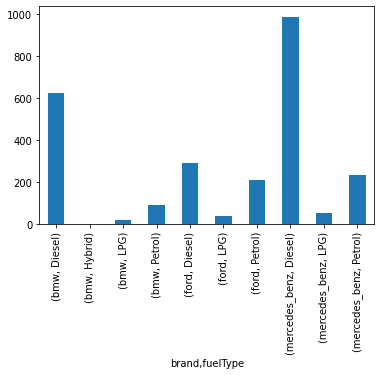

In [48]:
df.groupby(['brand','fuelType']).size().head(12).plot(kind='bar');


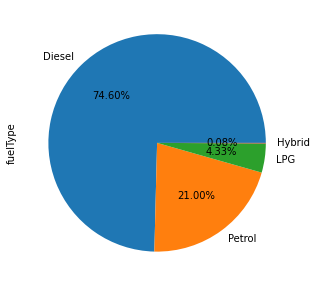

In [49]:
plt.figure(figsize=(15,5))
df['fuelType'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

In [50]:
df['Age'].value_counts()

15     216
16     211
13     201
14     188
18     170
11     169
10     159
12     153
20     136
17     131
19     129
21      93
9       86
8       80
7       74
22      64
23      56
24      46
26      28
25      24
27      17
6       16
30      13
28      11
32       9
31       7
29       7
33       6
41       5
36       5
37       4
35       3
38       3
44       3
42       3
34       2
45       2
56       2
50       2
51       1
59       1
67       1
71       1
43       1
112      1
57       1
39       1
40       1
Name: Age, dtype: int64

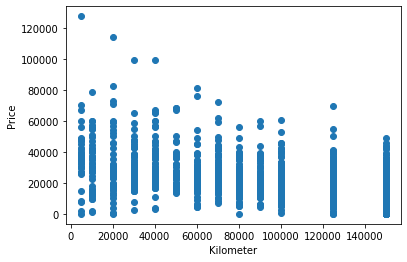

In [51]:
plt.scatter(x=df['kilometer'], y=df['price'])
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.show()

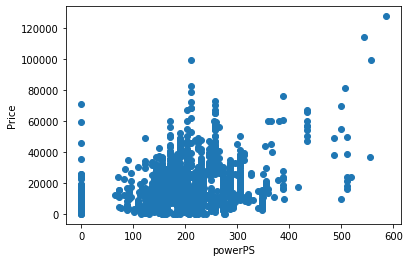

In [52]:
plt.scatter(df['powerPS'], df['price'])
plt.xlabel('powerPS')
plt.ylabel('Price')
plt.show()

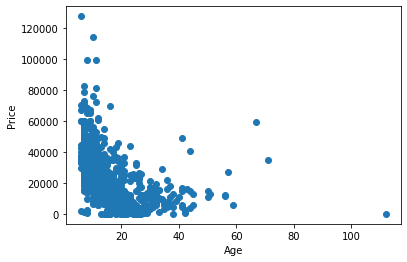

In [53]:
plt.scatter(df['Age'], df['price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

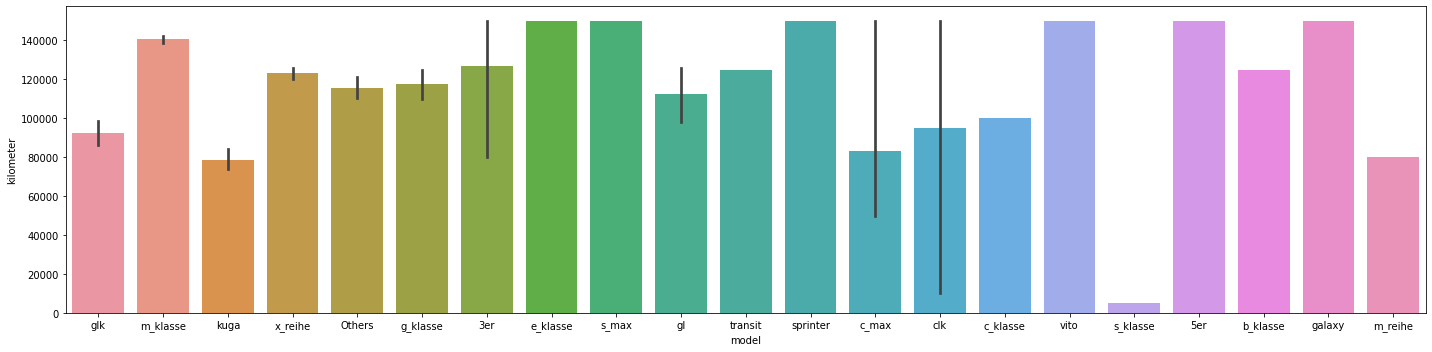

In [54]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['model'],y=df['kilometer'])
plt.tight_layout()
plt.show()

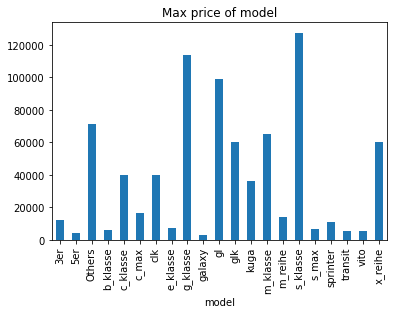

In [55]:
df.groupby('model')['price'].max().plot(kind='bar')
plt.title('Max price of model')
plt.show()

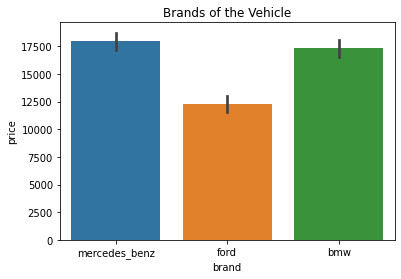

In [56]:
sns.barplot(x='brand',y='price',data=df)
plt.title('Brands of the Vehicle')
plt.show()

In [57]:
df

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Automatic,204,glk,40000,9,Diesel,mercedes_benz,No,41900,8
1,suv,2009,Automatic,224,m_klasse,150000,12,Diesel,mercedes_benz,No,27500,13
2,suv,2007,Automatic,510,m_klasse,150000,4,LPG,mercedes_benz,No,21500,15
3,suv,2009,Automatic,224,glk,90000,8,Diesel,mercedes_benz,No,21500,13
4,suv,2014,Manual,163,kuga,30000,7,Diesel,ford,No,25950,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2538,suv,2007,Automatic,218,x_reihe,150000,4,Diesel,bmw,No,12000,15
2539,suv,2005,Manual,218,x_reihe,150000,12,Diesel,bmw,No,9900,17
2540,suv,2008,Automatic,235,x_reihe,100000,1,Diesel,bmw,No,23500,14
2541,suv,2012,Automatic,300,m_klasse,100000,3,Diesel,mercedes_benz,No,44900,10


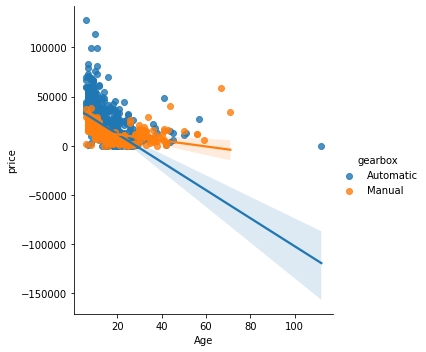

In [58]:
sns.lmplot(x='Age', y='price',data=df, hue='gearbox')
plt.show()

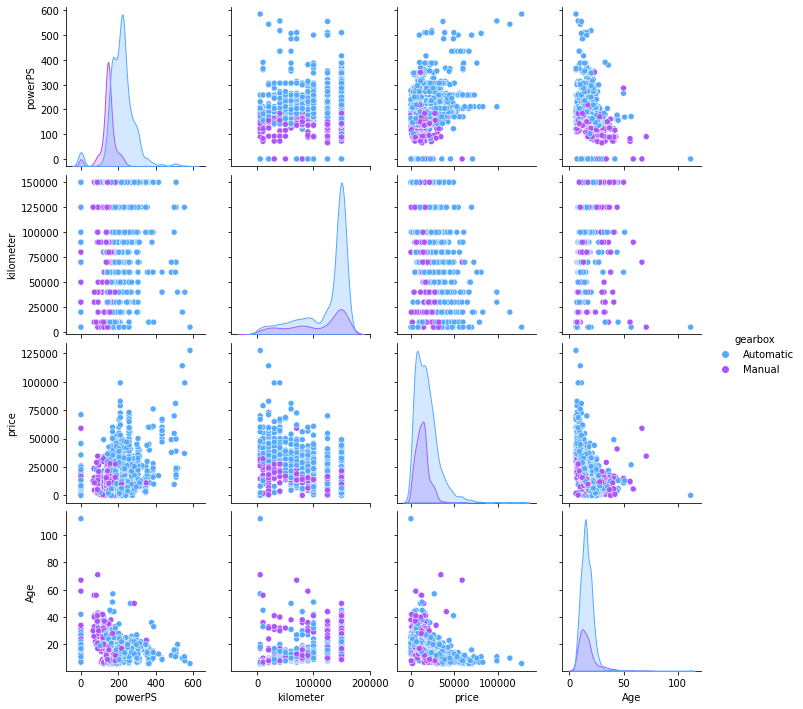

In [59]:
sns.pairplot(df.drop(['yearOfRegistration','monthOfRegistration'],axis=1),hue='gearbox',palette='cool')
plt.show()

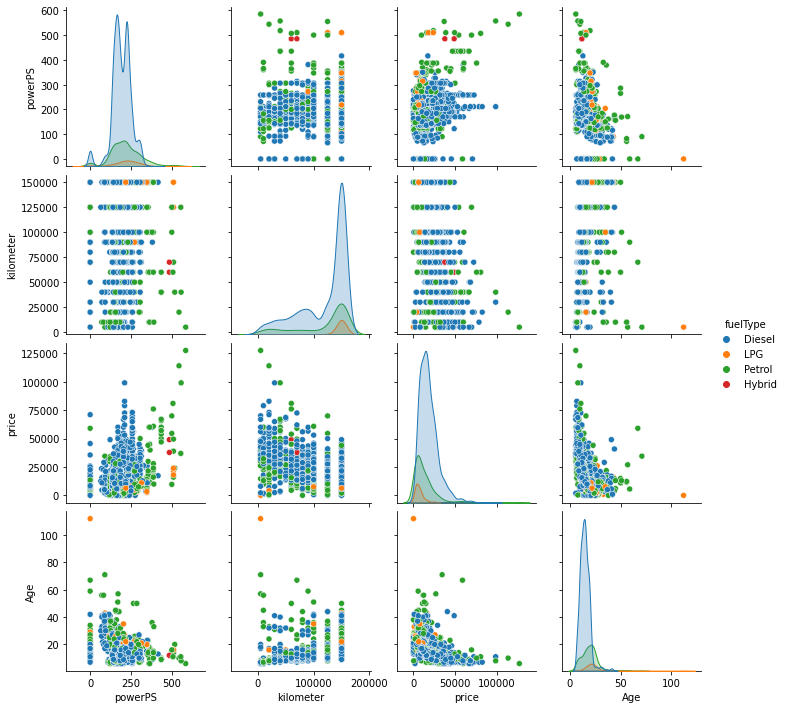

In [60]:
sns.pairplot(df.drop(['yearOfRegistration','monthOfRegistration'],axis=1),hue='fuelType')
plt.show()

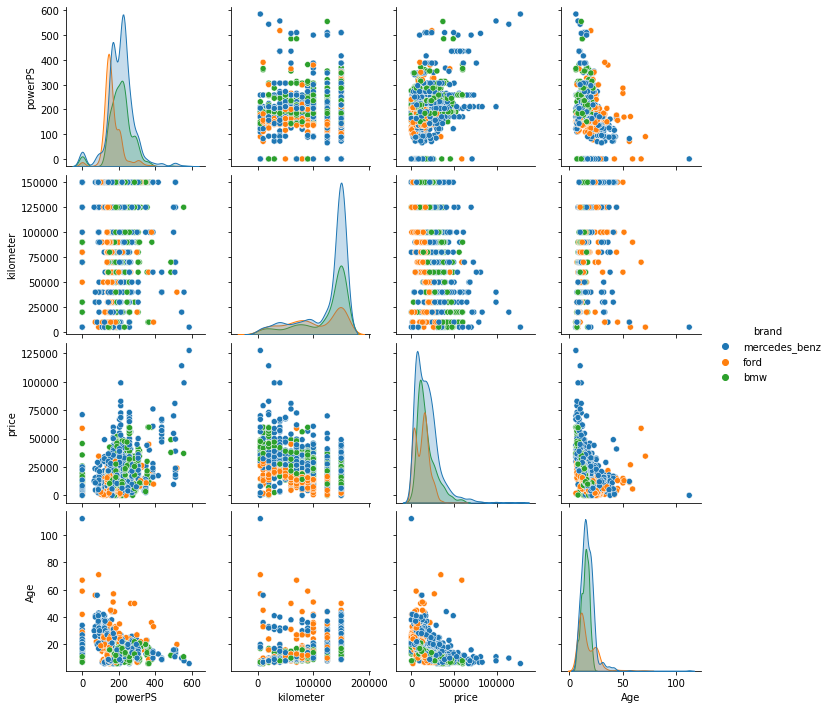

In [61]:
sns.pairplot(df.drop(['yearOfRegistration','monthOfRegistration'],axis=1),hue='brand')
plt.show()

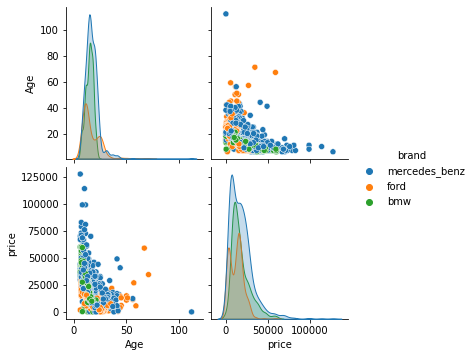

In [62]:
sns.pairplot(df,vars=['Age','price'],hue='brand')
plt.show()

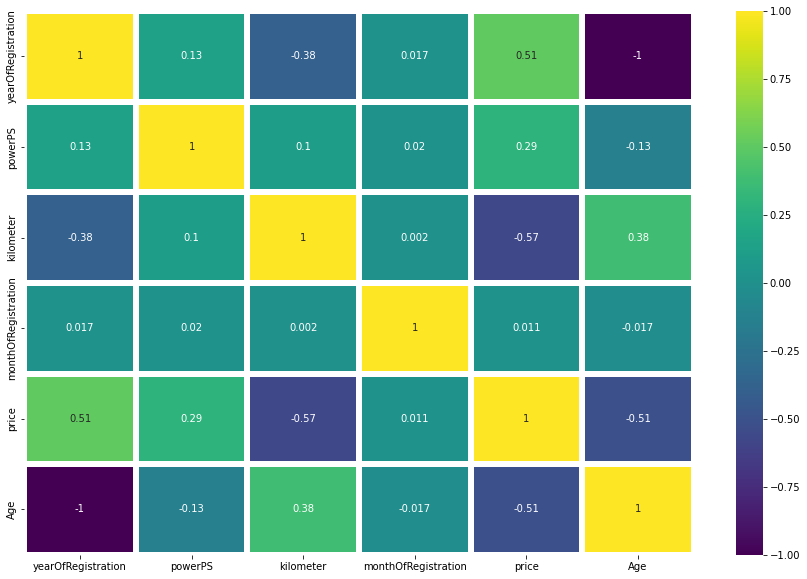

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot =True, linewidths=5, cmap='viridis')
plt.show()

# Suv_benz

In [64]:
suv_benz = auto[(auto['vehicleType']=='suv') & (auto['brand']=='mercedes_benz')]
suv_benz


,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
89,privat,Angebot,suv,2014,Automatic,204,glk,40000,9,Diesel,mercedes_benz,No,41900,8
182,privat,Angebot,suv,2009,Automatic,224,m_klasse,150000,12,Diesel,mercedes_benz,No,27500,13
261,privat,Angebot,suv,2007,Automatic,510,m_klasse,150000,4,LPG,mercedes_benz,No,21500,15
432,privat,Angebot,suv,2009,Automatic,224,glk,90000,8,Diesel,mercedes_benz,No,21500,13
848,privat,Angebot,suv,2011,Automatic,231,glk,70000,10,Diesel,mercedes_benz,No,26500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248021,privat,Angebot,suv,2001,Automatic,163,m_klasse,150000,8,Diesel,mercedes_benz,No,5700,21
248068,privat,Angebot,suv,2005,Automatic,0,m_klasse,150000,1,Diesel,mercedes_benz,No,8500,17
248078,privat,Angebot,suv,2013,Manual,143,glk,150000,9,Diesel,mercedes_benz,No,21500,9
249068,privat,Angebot,suv,2012,Automatic,300,m_klasse,100000,3,Diesel,mercedes_benz,No,44900,10


In [65]:
suv_benz.drop(labels=['seller','offerType'],axis=1,inplace=True)

In [66]:
suv_benz.reset_index(inplace=True)

In [67]:
suv_benz.drop(labels=['index'],axis=1,inplace=True)

In [68]:
suv_benz.shape

(1272, 12)

## Machine Learning Regression

In [69]:
suv_benz.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Automatic,204,glk,40000,9,Diesel,mercedes_benz,No,41900,8
1,suv,2009,Automatic,224,m_klasse,150000,12,Diesel,mercedes_benz,No,27500,13
2,suv,2007,Automatic,510,m_klasse,150000,4,LPG,mercedes_benz,No,21500,15
3,suv,2009,Automatic,224,glk,90000,8,Diesel,mercedes_benz,No,21500,13
4,suv,2011,Automatic,231,glk,70000,10,Diesel,mercedes_benz,No,26500,11


In [70]:
# feature Engineering

x = suv_benz.loc[:,['powerPS','kilometer','Age']]
y = suv_benz.price # for regression (linear regression )
#z = suv_benz.notRepairedDamage  # for classification (logistics )


In [71]:
x.shape,y.shape

((1272, 3), (1272,))

In [72]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [73]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((890, 3), (382, 3), (890,), (382,))

In [74]:
# model building
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [75]:
model_lr = LinearRegression()
model_kn = KNeighborsRegressor(n_neighbors=100)
model_svr = SVR()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [76]:
# Fitting Process & predicting
rmodels = [model_lr,model_kn,model_svr,model_dtr,model_rfr]

for rgs in rmodels:
    rgs.fit(x_train,y_train)
    print(rgs)
    if rgs == model_lr:
        pred_lr = rgs.predict(x_test)
    elif rgs== model_kn:
        pred_kn = rgs.predict(x_test)     
    elif rgs == model_svr:
        pred_svr = rgs.predict(x_test)
    elif rgs == model_dtr:
        pred_dtr = rgs.predict(x_test)
    elif rgs == model_rfr:
        pred_rfr = rgs.predict(x_test)

LinearRegression()
KNeighborsRegressor(n_neighbors=100)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()


In [77]:
# check MSE , r2_score
from sklearn.metrics import mean_squared_error,r2_score

In [78]:
pred_mod = ['pred_lr','pred_kn','pred_svr','pred_dtr','pred_rfr']

for y_pred in pred_mod:
    if y_pred == 'pred_lr':
      print("Accuracy for Linear Regression:",r2_score(y_test,pred_lr))
      print('Error for Linear Regression:',mean_squared_error(y_test,pred_lr))
      print('')
    elif y_pred == 'pred_kn':
      print("Accuracy for K Neighbors Regression:",r2_score(y_test,pred_kn))
      print('Error for K Neighbors Regression:',mean_squared_error(y_test,pred_kn))
      print('')
    elif y_pred == 'pred_svr':
      print(" Accuracy of SVR:",r2_score(y_test,pred_svr))
      print('Error for SVR:',mean_squared_error(y_test,pred_svr))
      print('')
    elif y_pred == 'pred_dtr':
      print(" Accuracy of Decision Tree:",r2_score(y_test,pred_dtr))
      print('Error for Decision Tree:',mean_squared_error(y_test,pred_dtr))
      print('')
    elif y_pred == 'pred_rfr':
      print(" Accuracy of Random Forest:",r2_score(y_test,pred_rfr))
      print('Error for Random FOrest:',mean_squared_error(y_test,pred_rfr))

Accuracy for Linear Regression: 0.5418686812849691
Error for Linear Regression: 96594657.92990357

Accuracy for K Neighbors Regression: 0.4493681630758315
Error for K Neighbors Regression: 116097921.62253115

 Accuracy of SVR: -0.005408180738093904
Error for SVR: 211985200.1620786

 Accuracy of Decision Tree: 0.5782477030653572
Error for Decision Tree: 88924326.25610045

 Accuracy of Random Forest: 0.7190464763484932
Error for Random FOrest: 59237621.18563928


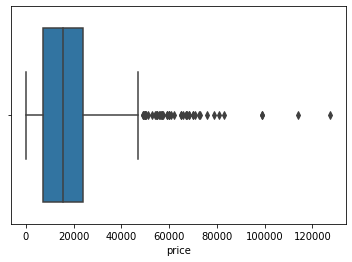

In [79]:
sns.boxplot(x=suv_benz['price']);

In [80]:
q1=suv_benz['price'].quantile(0.25) # 1st quartile
q3=suv_benz['price'].quantile(0.75)  # 3rd quartile

In [81]:
q2=suv_benz['price'].quantile(0.50) # 2nd quartile

In [82]:
suv_benz['price'].median() # median == 2nd quartile

15500.0

In [83]:
print(q1,q2,q3)

7216.25 15500.0 23900.0


In [84]:
IQR = q3-q1
IQR

16683.75

In [85]:
L= q1-1.5*IQR  # lower limit
L

-17809.375

In [86]:
U = q3+1.5*IQR
U

48925.625

In [87]:
# check lower limits
suv_benz[suv_benz['price']<L]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age


In [88]:
# Check Upper Limits
suv_benz[suv_benz['price']>U]


,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
31,suv,2015,Automatic,170,Others,10000,9,Diesel,mercedes_benz,No,50999,7
39,suv,2008,Automatic,500,g_klasse,125000,11,Petrol,mercedes_benz,No,54500,14
58,suv,2015,Automatic,258,Others,10000,7,Diesel,mercedes_benz,No,57500,7
65,suv,2015,Automatic,211,g_klasse,10000,7,Diesel,mercedes_benz,No,78900,7
102,suv,2012,Automatic,258,m_klasse,50000,11,Diesel,mercedes_benz,No,50000,10
130,suv,2008,Automatic,224,g_klasse,80000,6,Diesel,mercedes_benz,No,48989,14
136,suv,2015,Automatic,204,Others,10000,11,Diesel,mercedes_benz,No,54800,7
141,suv,2012,Automatic,265,gl,40000,3,Diesel,mercedes_benz,No,55900,10
181,suv,2014,Automatic,258,m_klasse,40000,1,Diesel,mercedes_benz,No,65000,8
186,suv,2013,Automatic,170,glk,40000,1,Diesel,mercedes_benz,No,60000,9


In [89]:
suv_benz.shape

(1272, 12)

In [90]:
suv_benz.drop(suv_benz[suv_benz['price']>U].index,axis=0,inplace=True)

In [91]:
suv_benz.shape

(1223, 12)

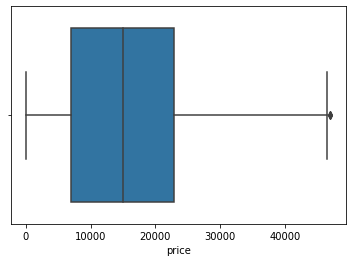

In [92]:
sns.boxplot(x=suv_benz['price']);

In [93]:
q1=suv_benz['price'].quantile(0.25) # 1st quartile
q3=suv_benz['price'].quantile(0.75)  # 3rd quartile

In [94]:
print(q1,q3)

6945.0 22900.0


In [95]:
IQR = q3-q1
IQR

15955.0

In [96]:
L= q1-1.5*IQR  # lower limit
L

-16987.5

In [97]:
U = q3+1.5*IQR
U

46832.5

In [98]:
# check lower limits
suv_benz[suv_benz['price']<L]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age


In [99]:
# check lower limits
suv_benz[suv_benz['price']>U]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
171,suv,2015,Automatic,204,glk,5000,5,Diesel,mercedes_benz,No,47000,7
817,suv,2013,Automatic,258,Others,50000,10,Diesel,mercedes_benz,No,46900,9
843,suv,2013,Automatic,435,gl,40000,9,Petrol,mercedes_benz,No,47000,9


In [100]:
suv_benz.shape

(1223, 12)

In [101]:
suv_benz.drop(suv_benz[suv_benz['price']>U].index,axis=0,inplace=True)

In [102]:
suv_benz.shape

(1220, 12)

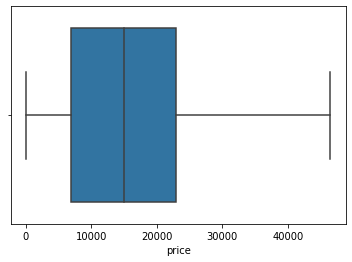

In [103]:
sns.boxplot(x=suv_benz['price']);

In [104]:
suv_benz

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Automatic,204,glk,40000,9,Diesel,mercedes_benz,No,41900,8
1,suv,2009,Automatic,224,m_klasse,150000,12,Diesel,mercedes_benz,No,27500,13
2,suv,2007,Automatic,510,m_klasse,150000,4,LPG,mercedes_benz,No,21500,15
3,suv,2009,Automatic,224,glk,90000,8,Diesel,mercedes_benz,No,21500,13
4,suv,2011,Automatic,231,glk,70000,10,Diesel,mercedes_benz,No,26500,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,suv,2001,Automatic,163,m_klasse,150000,8,Diesel,mercedes_benz,No,5700,21
1268,suv,2005,Automatic,0,m_klasse,150000,1,Diesel,mercedes_benz,No,8500,17
1269,suv,2013,Manual,143,glk,150000,9,Diesel,mercedes_benz,No,21500,9
1270,suv,2012,Automatic,300,m_klasse,100000,3,Diesel,mercedes_benz,No,44900,10


In [105]:
# feature Engineering

x = suv_benz.loc[:,['powerPS','kilometer','Age']]
y = suv_benz.price # for regression (linear regression )
#z = suv_benz.notRepairedDamage  # for classification (logistics )


In [106]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [107]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((854, 3), (366, 3), (854,), (366,))

In [108]:
model_lr = LinearRegression()
model_kn = KNeighborsRegressor(n_neighbors=100)
model_svr = SVR()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [109]:
# Fitting Process & predicting
rmodels = [model_lr,model_kn,model_svr,model_dtr,model_rfr]

for rgs in rmodels:
    rgs.fit(x_train,y_train)
    print(rgs)
    if rgs == model_lr:
        pred_lr = rgs.predict(x_test)
    elif rgs== model_kn:
        pred_kn = rgs.predict(x_test)     
    elif rgs == model_svr:
        pred_svr = rgs.predict(x_test)
    elif rgs == model_dtr:
        pred_dtr = rgs.predict(x_test)
    elif rgs == model_rfr:
        pred_rfr = rgs.predict(x_test)

LinearRegression()
KNeighborsRegressor(n_neighbors=100)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()


In [110]:
# check MSE, r2_score
from sklearn.metrics import mean_squared_error,r2_score

In [111]:
y_test

14       4200
892     10890
738     13490
235     20997
1082    18500
        ...  
381     25700
16       6900
267     14500
614     17500
650      9000
Name: price, Length: 366, dtype: int64

In [112]:
pred_mod = ['pred_lr','pred_kn','pred_svr','pred_dtr','pred_rfr']

for y_pred in pred_mod:
    if y_pred == 'pred_lr':
      print("Accuracy for Linear Regression:",r2_score(y_test,pred_lr))
      print('Error for Linear Regression:',mean_squared_error(y_test,pred_lr))
      print('')
    elif y_pred == 'pred_kn':
      print("Accuracy for K Neighbors Regression:",r2_score(y_test,pred_kn))
      print('Error for K Neighbors Regression:',mean_squared_error(y_test,pred_kn))
      print('')
    elif y_pred == 'pred_svr':
      print(" Accuracy of SVR:",r2_score(y_test,pred_svr))
      print('Error for SVR:',mean_squared_error(y_test,pred_svr))
      print('')
    elif y_pred == 'pred_dtr':
      print(" Accuracy of Decision Tree:",r2_score(y_test,pred_dtr))
      print('Error for Decision Tree:',mean_squared_error(y_test,pred_dtr))
      print('')
    elif y_pred == 'pred_rfr':
      print(" Accuracy of Random Forest:",r2_score(y_test,pred_rfr))
      print('Error for Random FOrest:',mean_squared_error(y_test,pred_rfr))

Accuracy for Linear Regression: 0.5207842492368029
Error for Linear Regression: 48824499.29203733

Accuracy for K Neighbors Regression: 0.44705061052807205
Error for K Neighbors Regression: 56336789.91520738

 Accuracy of SVR: -0.013652023494765464
Error for SVR: 103275095.6634316

 Accuracy of Decision Tree: 0.6645821148036436
Error for Decision Tree: 34173773.02858855

 Accuracy of Random Forest: 0.6921750339026619
Error for Random FOrest: 31362491.352496516


Linear Regression Plot:


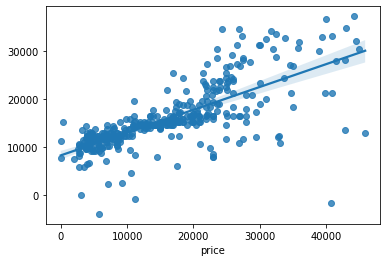

In [113]:
print('Linear Regression Plot:')
sns.regplot(y_test,pred_lr, logistic=False)
plt.show()

## Machine Learning Classification

In [114]:
suv_benz.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Automatic,204,glk,40000,9,Diesel,mercedes_benz,No,41900,8
1,suv,2009,Automatic,224,m_klasse,150000,12,Diesel,mercedes_benz,No,27500,13
2,suv,2007,Automatic,510,m_klasse,150000,4,LPG,mercedes_benz,No,21500,15
3,suv,2009,Automatic,224,glk,90000,8,Diesel,mercedes_benz,No,21500,13
4,suv,2011,Automatic,231,glk,70000,10,Diesel,mercedes_benz,No,26500,11


In [115]:
suv_benz.shape

(1220, 12)

In [116]:
suv_benz.notRepairedDamage.value_counts()

No     1157
Yes      63
Name: notRepairedDamage, dtype: int64

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
suv_benz['fuelType'] = le.fit_transform(suv_benz['fuelType'])
suv_benz['gearbox'] = le.fit_transform(suv_benz['gearbox'])

In [118]:
suv_benz.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,0,204,glk,40000,9,0,mercedes_benz,No,41900,8
1,suv,2009,0,224,m_klasse,150000,12,0,mercedes_benz,No,27500,13
2,suv,2007,0,510,m_klasse,150000,4,1,mercedes_benz,No,21500,15
3,suv,2009,0,224,glk,90000,8,0,mercedes_benz,No,21500,13
4,suv,2011,0,231,glk,70000,10,0,mercedes_benz,No,26500,11


In [119]:
suv_benz['notRepairedDamage'].value_counts()

No     1157
Yes      63
Name: notRepairedDamage, dtype: int64

In [120]:
# feature Engineering

c = suv_benz.loc[:,['powerPS','gearbox','kilometer','fuelType','Age']]

z = suv_benz.notRepairedDamage  # for classification (logistics )

In [121]:
c.shape

(1220, 5)

In [122]:
z.shape

(1220,)

In [123]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(c,z,test_size=0.30,random_state=12)

In [124]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((854, 5), (366, 5), (854,), (366,))

In [125]:
# pip install imblearn

In [126]:
# from imblearn import over_sampling
# from ._smote_enn import SMOTEENN

In [127]:
# from . imblearn.over_sampling import SMOTE 
# counter = Counter(y1_train)
# smt = SMOTE()
# x1_train_sm,y1_train_sm = smt.fit_resample(x1_train,y1_train)
# counter = Counter(y1_train_sm)

In [128]:
# model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
model_log = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=100)
model_svc = SVC()
model_dtc = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [130]:
# Fitting Process & predicting
cmodels = [model_log,model_knn,model_svc,model_dtc,model_rf]

for clf in cmodels:
    print(clf)
    clf.fit(x1_train,y1_train)
    if clf == model_log:
        predict_log = clf.predict(x1_test)
    elif clf== model_knn:
        predict_knn = clf.predict(x1_test)     
    elif clf == model_svc:
        predict_svc = clf.predict(x1_test)
    elif clf == model_dtc:
        predict_dtc = clf.predict(x1_test)
    elif clf == model_rf:
        predict_rf = clf.predict(x1_test)

LogisticRegression()
KNeighborsClassifier(n_neighbors=100)
SVC()
DecisionTreeClassifier()
RandomForestClassifier()


In [131]:
type(cmodels)

list

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [133]:
pred_mod = ['predict_log','predict_knn','predict_svc','predict_dtc','predict_rf']

for y_pred in pred_mod:
    if y_pred == 'predict_log':
        print("Confusion Matrix for Logistic Regression:\n",confusion_matrix(y1_test,predict_log))
        print("Accuracy Score for Logistic Regression:",accuracy_score(y1_test,predict_log))
        print('')
    elif y_pred == 'predict_knn':
        print("Confusion Matrix for KNN:\n",confusion_matrix(y1_test,predict_knn))
        print("Accuracy Score for KNN:",accuracy_score(y1_test,predict_knn))
        print('')
    elif y_pred == 'predict_svc':
      print("Confusion Matrix for SVC:\n",confusion_matrix(y1_test,predict_svc))
      print("Accuracy Score for SVC:",accuracy_score(y1_test,predict_svc))
    elif y_pred == 'predict_dtc':
        print("Confusion Matrix for Decision Tree:\n",confusion_matrix(y1_test,predict_dtc))
        print("Accuracy Score for Decision Tree:",accuracy_score(y1_test,predict_dtc))
        print('')
    elif y_pred == 'predict_rf':
        print("Confusion Matrix for Random Forest:\n",confusion_matrix(y1_test,predict_rf))
        print("Accuracy Score for Random Forest:",accuracy_score(y1_test,predict_rf))

Confusion Matrix for Logistic Regression:
 [[349   0]
 [ 17   0]]
Accuracy Score for Logistic Regression: 0.953551912568306

Confusion Matrix for KNN:
 [[349   0]
 [ 17   0]]
Accuracy Score for KNN: 0.953551912568306

Confusion Matrix for SVC:
 [[349   0]
 [ 17   0]]
Accuracy Score for SVC: 0.953551912568306
Confusion Matrix for Decision Tree:
 [[343   6]
 [ 14   3]]
Accuracy Score for Decision Tree: 0.9453551912568307

Confusion Matrix for Random Forest:
 [[347   2]
 [ 14   3]]
Accuracy Score for Random Forest: 0.9562841530054644


In [134]:
for clfr in pred_mod:
    if clfr == 'predict_log':
        print("Classification Report for Logistic Regression:")
        print(classification_report(y1_test,predict_log),'\n')
    elif clfr == 'predict_knn':
        print("Classification Report for KNN:")
        print(classification_report(y1_test,predict_knn),'\n')
    elif clfr == 'predict_svc':
      print("Classification Report for SVC:")
      print(classification_report(y1_test,predict_svc),'\n')
    elif clfr == 'predict_dtc':
        print("Classification Report for Decision Tree:")
        print(classification_report(y1_test,predict_dtc),'\n')
    elif clfr == 'predict_rf':
        print("Classification Report for Random Forest:")
        print(classification_report(y1_test,predict_rf),'\n')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.95      1.00      0.98       349
         Yes       0.00      0.00      0.00        17

    accuracy                           0.95       366
   macro avg       0.48      0.50      0.49       366
weighted avg       0.91      0.95      0.93       366
 

Classification Report for KNN:
              precision    recall  f1-score   support

          No       0.95      1.00      0.98       349
         Yes       0.00      0.00      0.00        17

    accuracy                           0.95       366
   macro avg       0.48      0.50      0.49       366
weighted avg       0.91      0.95      0.93       366
 

Classification Report for SVC:
              precision    recall  f1-score   support

          No       0.95      1.00      0.98       349
         Yes       0.00      0.00      0.00        17

    accuracy                           0.95       366
   macro avg   

# Suv_bmw

In [135]:
suv_bmw = auto[(auto['vehicleType']=='suv') & (auto['brand']=='bmw')]
suv_bmw

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
1030,privat,Angebot,suv,2014,Automatic,190,x_reihe,30000,8,Diesel,bmw,No,42500,8
1332,privat,Angebot,suv,2011,Automatic,184,x_reihe,60000,6,Diesel,bmw,No,33400,11
1650,privat,Angebot,suv,2011,Automatic,245,x_reihe,125000,1,Diesel,bmw,No,26900,11
1846,privat,Angebot,suv,2010,Automatic,177,x_reihe,125000,1,Diesel,bmw,No,19999,12
1918,privat,Angebot,suv,2004,Manual,150,x_reihe,125000,12,Diesel,bmw,No,11900,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247148,privat,Angebot,suv,2006,Manual,150,x_reihe,150000,1,Diesel,bmw,No,10499,16
247734,privat,Angebot,suv,2010,Manual,184,x_reihe,150000,9,Diesel,bmw,No,15900,12
248254,privat,Angebot,suv,2007,Automatic,218,x_reihe,150000,4,Diesel,bmw,No,12000,15
248601,privat,Angebot,suv,2005,Manual,218,x_reihe,150000,12,Diesel,bmw,No,9900,17


In [136]:
suv_bmw.reset_index(inplace=True)
suv_bmw.drop('index',axis=1,inplace=True)

In [137]:
suv_bmw.drop(labels=['seller','offerType'],axis=1,inplace=True)

In [138]:
suv_bmw.shape

(734, 12)

## Machine Learning Regression

In [139]:
suv_bmw.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Automatic,190,x_reihe,30000,8,Diesel,bmw,No,42500,8
1,suv,2011,Automatic,184,x_reihe,60000,6,Diesel,bmw,No,33400,11
2,suv,2011,Automatic,245,x_reihe,125000,1,Diesel,bmw,No,26900,11
3,suv,2010,Automatic,177,x_reihe,125000,1,Diesel,bmw,No,19999,12
4,suv,2004,Manual,150,x_reihe,125000,12,Diesel,bmw,No,11900,18


In [140]:
# feature Engineering

x = suv_bmw.loc[:,['powerPS','kilometer','Age']]
y = suv_bmw.price # for regression (linear regression )


In [141]:
x.shape,y.shape

((734, 3), (734,))

In [142]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [143]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((513, 3), (221, 3), (513,), (221,))

In [144]:
# model building
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [145]:
model_lr = LinearRegression()
model_kn = KNeighborsRegressor(n_neighbors=100)
model_svr = SVR()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [146]:
# Fitting Process & predicting
rmodels = [model_lr,model_kn,model_svr,model_dtr,model_rfr]

for rgs in rmodels:
    rgs.fit(x_train,y_train)
    print(rgs)
    if rgs == model_lr:
        pred_lr = rgs.predict(x_test)
    elif rgs== model_kn:
        pred_kn = rgs.predict(x_test)     
    elif rgs == model_svr:
        pred_svr = rgs.predict(x_test)
    elif rgs == model_dtr:
        pred_dtr = rgs.predict(x_test)
    elif rgs == model_rfr:
        pred_rfr = rgs.predict(x_test)

LinearRegression()
KNeighborsRegressor(n_neighbors=100)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()


In [147]:
# check MSE , r2_score
from sklearn.metrics import mean_squared_error,r2_score

In [148]:
pred_mod = ['pred_lr','pred_kn','pred_svr','pred_dtr','pred_rfr']

for y_pred in pred_mod:
    if y_pred == 'pred_lr':
      print("Accuracy for Linear Regression:",r2_score(y_test,pred_lr))
      print('Error for Linear Regression:',mean_squared_error(y_test,pred_lr))
      print('')
    elif y_pred == 'pred_kn':
      print("Accuracy for K Neighbors Regression:",r2_score(y_test,pred_kn))
      print('Error for K Neighbors Regression:',mean_squared_error(y_test,pred_kn))
      print('')
    elif y_pred == 'pred_svr':
      print(" Accuracy of SVR:",r2_score(y_test,pred_svr))
      print('Error for SVR:',mean_squared_error(y_test,pred_svr))
      print('')
    elif y_pred == 'pred_dtr':
      print(" Accuracy of Decision Tree:",r2_score(y_test,pred_dtr))
      print('Error for Decision Tree:',mean_squared_error(y_test,pred_dtr))
      print('')
    elif y_pred == 'pred_rfr':
      print(" Accuracy of Random Forest:",r2_score(y_test,pred_rfr))
      print('Error for Random FOrest:',mean_squared_error(y_test,pred_rfr))

Accuracy for Linear Regression: 0.6943535110851689
Error for Linear Regression: 43345927.25836744

Accuracy for K Neighbors Regression: 0.45130468586940464
Error for K Neighbors Regression: 77814429.53182173

 Accuracy of SVR: -0.08194954379922614
Error for SVR: 153439047.8007857

 Accuracy of Decision Tree: 0.7823425233795602
Error for Decision Tree: 30867572.476706423

 Accuracy of Random Forest: 0.8272708474610373
Error for Random FOrest: 24495963.64720429


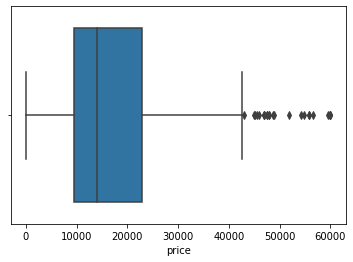

In [149]:
sns.boxplot(x=suv_bmw['price']);

In [150]:
Q1=suv_bmw['price'].quantile(0.25) # 1st quartile
Q3=suv_bmw['price'].quantile(0.75)  # 3rd quartile
iqr=Q3-Q1
l= Q1-1.5*iqr  # lower limit
u = Q3+1.5*iqr

In [151]:
# check lower limits
suv_bmw[suv_bmw['price']<l]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age


In [152]:
# check Upper Limits
suv_bmw[suv_bmw['price']>u]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
63,suv,2015,Automatic,258,x_reihe,10000,8,Diesel,bmw,No,55800,7
131,suv,2015,Automatic,190,x_reihe,5000,11,Diesel,bmw,No,44890,7
138,suv,2010,Automatic,485,x_reihe,60000,6,Hybrid,bmw,No,48999,12
177,suv,2013,Automatic,381,x_reihe,90000,6,Diesel,bmw,No,59900,9
218,suv,2015,Automatic,258,x_reihe,10000,3,Diesel,bmw,No,54900,7
223,suv,2015,Automatic,190,x_reihe,20000,7,Diesel,bmw,No,51900,7
228,suv,2014,Automatic,258,x_reihe,80000,3,Diesel,bmw,No,55900,8
283,suv,2015,Automatic,258,x_reihe,20000,4,Diesel,bmw,No,54300,7
334,suv,2015,Automatic,190,x_reihe,30000,7,Diesel,bmw,No,46900,7
366,suv,2016,Automatic,360,x_reihe,10000,3,Petrol,bmw,No,59990,6


In [153]:
suv_bmw.shape

(734, 12)

In [154]:
suv_bmw.drop(suv_bmw[suv_bmw['price']>u].index,axis=0,inplace=True)

In [155]:
suv_bmw.shape

(709, 12)

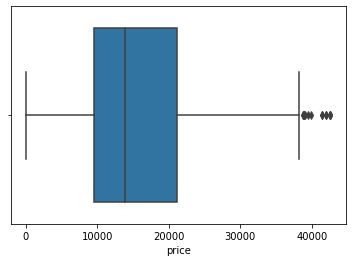

In [156]:
sns.boxplot(x=suv_bmw['price']);

In [157]:
Q1=suv_bmw['price'].quantile(0.25) # 1st quartile
Q3=suv_bmw['price'].quantile(0.75)  # 3rd quartile
iqr=Q3-Q1
l= Q1-1.5*iqr  # lower limit
u = Q3+1.5*iqr

In [158]:
# check lower limits
suv_bmw[suv_bmw['price']<l]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age


In [159]:
# check Upper Limits
suv_bmw[suv_bmw['price']>u]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Automatic,190,x_reihe,30000,8,Diesel,bmw,No,42500,8
52,suv,2016,Automatic,190,x_reihe,10000,3,Diesel,bmw,No,42600,6
128,suv,2012,Automatic,258,x_reihe,60000,2,Diesel,bmw,No,38900,10
153,suv,2015,Automatic,190,x_reihe,5000,12,Diesel,bmw,No,41990,7
258,suv,2013,Automatic,184,x_reihe,30000,12,Petrol,bmw,No,38800,9
287,suv,2014,Automatic,313,x_reihe,90000,3,Diesel,bmw,No,39500,8
305,suv,2012,Automatic,245,x_reihe,80000,1,Diesel,bmw,No,39000,10
318,suv,2015,Automatic,192,x_reihe,10000,12,Petrol,bmw,No,39950,7
324,suv,2012,Automatic,306,x_reihe,70000,4,Diesel,bmw,No,41500,10
382,suv,2012,Automatic,245,x_reihe,100000,3,Diesel,bmw,No,38990,10


In [160]:
suv_bmw.drop(suv_bmw[suv_bmw['price']>u].index,axis=0,inplace=True)

In [161]:
suv_bmw.shape

(694, 12)

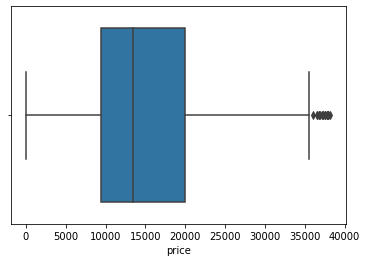

In [162]:
sns.boxplot(x=suv_bmw['price']);

In [163]:
Q1=suv_bmw['price'].quantile(0.25) # 1st quartile
Q3=suv_bmw['price'].quantile(0.75)  # 3rd quartile
iqr=Q3-Q1
l= Q1-1.5*iqr  # lower limit
u = Q3+1.5*iqr

In [164]:
# check lower limits
suv_bmw[suv_bmw['price']<l]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age


In [165]:
# check Upper Limits
suv_bmw[suv_bmw['price']>u]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
5,suv,2011,Automatic,258,x_reihe,70000,11,Diesel,bmw,No,36500,11
24,suv,2014,Manual,190,x_reihe,5000,2,Diesel,bmw,No,38200,8
34,suv,2012,Automatic,313,x_reihe,70000,4,Diesel,bmw,No,37900,10
51,suv,2012,Automatic,245,x_reihe,90000,9,Diesel,bmw,No,37500,10
114,suv,2016,Automatic,150,x_reihe,10000,3,Diesel,bmw,No,37300,6
121,suv,2011,Automatic,245,x_reihe,70000,5,Diesel,bmw,No,37900,11
160,suv,2012,Automatic,245,x_reihe,80000,1,Diesel,bmw,No,37599,10
172,suv,2012,Automatic,245,x_reihe,90000,9,Diesel,bmw,No,37850,10
274,suv,2014,Automatic,184,x_reihe,50000,4,Diesel,bmw,No,37250,8
410,suv,2011,Automatic,306,x_reihe,100000,8,Diesel,bmw,No,37500,11


In [166]:
suv_bmw.drop(suv_bmw[suv_bmw['price']>u].index,axis=0,inplace=True)

In [167]:
suv_bmw.shape

(675, 12)

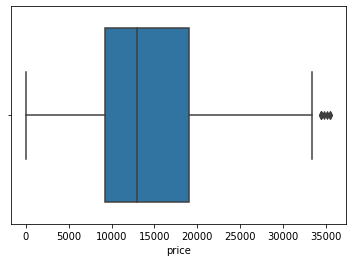

In [168]:
sns.boxplot(x=suv_bmw['price']);

In [169]:
Q1=suv_bmw['price'].quantile(0.25) # 1st quartile
Q3=suv_bmw['price'].quantile(0.75)  # 3rd quartile
iqr=Q3-Q1
l= Q1-1.5*iqr  # lower limit
u = Q3+1.5*iqr

In [170]:
# check Upper Limits
suv_bmw[suv_bmw['price']>u]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
120,suv,2010,Automatic,306,x_reihe,125000,8,Diesel,bmw,No,35190,12
169,suv,2010,Automatic,306,x_reihe,150000,11,Diesel,bmw,No,34490,12
203,suv,2009,Automatic,286,x_reihe,150000,3,Diesel,bmw,No,34500,13
400,suv,2012,Automatic,258,x_reihe,90000,5,Diesel,bmw,No,34850,10
586,suv,2010,Automatic,306,x_reihe,80000,0,Diesel,bmw,No,35499,12
698,suv,2012,Automatic,313,x_reihe,90000,3,Diesel,bmw,No,34500,10
722,suv,2011,Automatic,0,x_reihe,90000,11,Diesel,bmw,No,35550,11


In [171]:
suv_bmw.drop(suv_bmw[suv_bmw['price']>u].index,axis=0,inplace=True)

In [172]:
suv_bmw.shape

(668, 12)

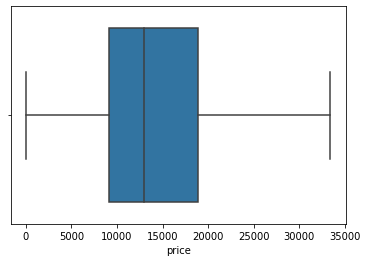

In [173]:
sns.boxplot(x=suv_bmw['price']);

In [174]:
suv_bmw.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
1,suv,2011,Automatic,184,x_reihe,60000,6,Diesel,bmw,No,33400,11
2,suv,2011,Automatic,245,x_reihe,125000,1,Diesel,bmw,No,26900,11
3,suv,2010,Automatic,177,x_reihe,125000,1,Diesel,bmw,No,19999,12
4,suv,2004,Manual,150,x_reihe,125000,12,Diesel,bmw,No,11900,18
6,suv,2011,Manual,220,x_reihe,150000,7,Diesel,bmw,No,16990,11


In [175]:
# feature Engineering

x = suv_bmw.loc[:,['powerPS','kilometer','Age']]
y = suv_bmw.price # for regression (linear regression )


In [176]:
x.shape

(668, 3)

In [177]:
y.shape

(668,)

In [178]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [179]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((467, 3), (201, 3), (467,), (201,))

In [180]:
# model building
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [181]:
model_lr = LinearRegression()
model_kn = KNeighborsRegressor(n_neighbors=100)
model_svr = SVR()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [182]:
# Fitting Process & predicting
rmodels = [model_lr,model_kn,model_svr,model_dtr,model_rfr]

for rgs in rmodels:
    rgs.fit(x_train,y_train)
    print(rgs)
    if rgs == model_lr:
        pred_lr = rgs.predict(x_test)
    elif rgs== model_kn:
        pred_kn = rgs.predict(x_test)     
    elif rgs == model_svr:
        pred_svr = rgs.predict(x_test)
    elif rgs == model_dtr:
        pred_dtr = rgs.predict(x_test)
    elif rgs == model_rfr:
        pred_rfr = rgs.predict(x_test)

LinearRegression()
KNeighborsRegressor(n_neighbors=100)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()


In [183]:
y_test

257     7800
333     5499
466     8300
413    13960
679    11900
       ...  
240    16900
395    20500
442    13800
425    10400
364    17890
Name: price, Length: 201, dtype: int64

In [184]:
# check MSE,MAE, r2_score
from sklearn.metrics import mean_squared_error,r2_score

In [185]:
pred_mod = ['pred_lr','pred_kn','pred_svr','pred_dtr','pred_rfr']

for y_pred in pred_mod:
    if y_pred == 'pred_lr':
      print("Accuracy for Linear Regression:",r2_score(y_test,pred_lr))
      print('Error for Linear Regression:',mean_squared_error(y_test,pred_lr))
      print('')
    elif y_pred == 'pred_kn':
      print("Accuracy for K Neighbors Regression:",r2_score(y_test,pred_kn))
      print('Error for K Neighbors Regression:',mean_squared_error(y_test,pred_kn))
      print('')
    elif y_pred == 'pred_svr':
      print(" Accuracy of SVR:",r2_score(y_test,pred_svr))
      print('Error for SVR:',mean_squared_error(y_test,pred_svr))
      print('')
    elif y_pred == 'pred_dtr':
      print(" Accuracy of Decision Tree:",r2_score(y_test,pred_dtr))
      print('Error for Decision Tree:',mean_squared_error(y_test,pred_dtr))
      print('')
    elif y_pred == 'pred_rfr':
      print(" Accuracy of Random Forest:",r2_score(y_test,pred_rfr))
      print('Error for Random FOrest:',mean_squared_error(y_test,pred_rfr))

Accuracy for Linear Regression: 0.6754049992328284
Error for Linear Regression: 17462916.357765462

Accuracy for K Neighbors Regression: 0.36113007778977013
Error for K Neighbors Regression: 34370621.81697562

 Accuracy of SVR: -0.11028277978637524
Error for SVR: 59732205.58250109

 Accuracy of Decision Tree: 0.6913413503637944
Error for Decision Tree: 16605555.13473276

 Accuracy of Random Forest: 0.7534195865355451
Error for Random FOrest: 13265802.38640722


Linear Regression Plot:


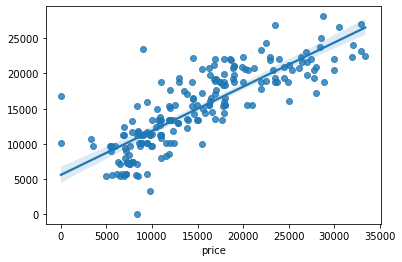

In [186]:
print('Linear Regression Plot:')
sns.regplot(x = y_test,y = pred_lr, logistic=False)
plt.show()

## Machine Learning Classification

In [187]:
suv_bmw.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
1,suv,2011,Automatic,184,x_reihe,60000,6,Diesel,bmw,No,33400,11
2,suv,2011,Automatic,245,x_reihe,125000,1,Diesel,bmw,No,26900,11
3,suv,2010,Automatic,177,x_reihe,125000,1,Diesel,bmw,No,19999,12
4,suv,2004,Manual,150,x_reihe,125000,12,Diesel,bmw,No,11900,18
6,suv,2011,Manual,220,x_reihe,150000,7,Diesel,bmw,No,16990,11


In [188]:
suv_bmw.shape

(668, 12)

In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
suv_bmw['fuelType'] = le.fit_transform(suv_bmw['fuelType'])
suv_bmw['gearbox'] = le.fit_transform(suv_bmw['gearbox'])

In [190]:
suv_bmw.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
1,suv,2011,0,184,x_reihe,60000,6,0,bmw,No,33400,11
2,suv,2011,0,245,x_reihe,125000,1,0,bmw,No,26900,11
3,suv,2010,0,177,x_reihe,125000,1,0,bmw,No,19999,12
4,suv,2004,1,150,x_reihe,125000,12,0,bmw,No,11900,18
6,suv,2011,1,220,x_reihe,150000,7,0,bmw,No,16990,11


In [191]:
# feature Engineering

c = suv_bmw.loc[:,['powerPS','gearbox','kilometer','fuelType','Age']]

z = suv_bmw.notRepairedDamage  # for classification (logistics )

In [192]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(c,z,test_size=0.30,random_state=12)

In [193]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((467, 5), (201, 5), (467,), (201,))

In [194]:
# model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [195]:
model_log = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=100)
model_svc = SVC()
model_dtc = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [196]:
# Fitting Process & predicting
cmodels = [model_log,model_knn,model_svc,model_dtc,model_rf]

for clf in cmodels:
    print(clf)
    clf.fit(x1_train,y1_train)
    if clf == model_log:
        predict_log = clf.predict(x1_test)
    elif clf== model_knn:
        predict_knn = clf.predict(x1_test)     
    elif clf == model_svc:
        predict_svc = clf.predict(x1_test)
    elif clf == model_dtc:
        predict_dtc = clf.predict(x1_test)
    elif clf == model_rf:
        predict_rf = clf.predict(x1_test)

LogisticRegression()
KNeighborsClassifier(n_neighbors=100)
SVC()
DecisionTreeClassifier()
RandomForestClassifier()


In [197]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [198]:
pred_mod = ['predict_log','predict_knn','predict_svc','predict_dtc','predict_rf']

for y_pred in pred_mod:
    if y_pred == 'predict_log':
        print("Confusion Matrix for Logistic Regression:\n",confusion_matrix(y1_test,predict_log))
        print("Accuracy Score for Logistic Regression:",accuracy_score(y1_test,predict_log))
        print('')
    elif y_pred == 'predict_knn':
        print("Confusion Matrix for KNN:\n",confusion_matrix(y1_test,predict_knn))
        print("Accuracy Score for KNN:",accuracy_score(y1_test,predict_knn))
        print('')
    elif y_pred == 'predict_svc':
      print("Confusion Matrix for SVC:\n",confusion_matrix(y1_test,predict_svc))
      print("Accuracy Score for SVC:",accuracy_score(y1_test,predict_svc))
    elif y_pred == 'predict_dtc':
        print("Confusion Matrix for Decision Tree:\n",confusion_matrix(y1_test,predict_dtc))
        print("Accuracy Score for Decision Tree:",accuracy_score(y1_test,predict_dtc))
        print('')
    elif y_pred == 'predict_rf':
        print("Confusion Matrix for Random Forest:\n",confusion_matrix(y1_test,predict_rf))
        print("Accuracy Score for Random Forest:",accuracy_score(y1_test,predict_rf))

Confusion Matrix for Logistic Regression:
 [[190   0]
 [ 11   0]]
Accuracy Score for Logistic Regression: 0.945273631840796

Confusion Matrix for KNN:
 [[190   0]
 [ 11   0]]
Accuracy Score for KNN: 0.945273631840796

Confusion Matrix for SVC:
 [[190   0]
 [ 11   0]]
Accuracy Score for SVC: 0.945273631840796
Confusion Matrix for Decision Tree:
 [[181   9]
 [ 10   1]]
Accuracy Score for Decision Tree: 0.9054726368159204

Confusion Matrix for Random Forest:
 [[185   5]
 [ 10   1]]
Accuracy Score for Random Forest: 0.9253731343283582


In [199]:
for clfr in pred_mod:
    if clfr == 'predict_log':
        print("Classification Report for Logistic Regression:")
        print(classification_report(y1_test,predict_log),'\n')
    elif clfr == 'predict_knn':
        print("Classification Report for KNN:")
        print(classification_report(y1_test,predict_knn),'\n')
    elif clfr == 'predict_svc':
      print("Classification Report for SVC:")
      print(classification_report(y1_test,predict_svc),'\n')
    elif clfr == 'predict_dtc':
        print("Classification Report for Decision Tree:")
        print(classification_report(y1_test,predict_dtc),'\n')
    elif clfr == 'predict_rf':
        print("Classification Report for Random Forest:")
        print(classification_report(y1_test,predict_rf),'\n')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       190
         Yes       0.00      0.00      0.00        11

    accuracy                           0.95       201
   macro avg       0.47      0.50      0.49       201
weighted avg       0.89      0.95      0.92       201
 

Classification Report for KNN:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       190
         Yes       0.00      0.00      0.00        11

    accuracy                           0.95       201
   macro avg       0.47      0.50      0.49       201
weighted avg       0.89      0.95      0.92       201
 

Classification Report for SVC:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       190
         Yes       0.00      0.00      0.00        11

    accuracy                           0.95       201
   macro avg   

# Suv_Ford

In [200]:
suv_ford = auto[(auto['vehicleType']=='suv') & (auto['brand']=='ford')]
suv_ford

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
636,privat,Angebot,suv,2014,Manual,163,kuga,30000,7,Diesel,ford,No,25950,8
1237,privat,Angebot,suv,2012,Manual,140,kuga,90000,11,Diesel,ford,No,14900,10
2187,privat,Angebot,suv,1998,Automatic,204,Others,150000,3,Petrol,ford,Yes,700,24
2235,privat,Angebot,suv,2009,Manual,136,kuga,150000,9,Diesel,ford,No,10990,13
2390,privat,Angebot,suv,2014,Automatic,163,kuga,90000,6,Diesel,ford,No,19999,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245444,privat,Angebot,suv,1998,Automatic,207,Others,150000,9,Petrol,ford,No,1799,24
245732,privat,Angebot,suv,2004,Manual,150,Others,125000,12,Petrol,ford,No,4450,18
246748,privat,Angebot,suv,1998,Automatic,147,Others,150000,6,Petrol,ford,No,2000,24
247662,privat,Angebot,suv,2012,Manual,140,kuga,125000,3,Diesel,ford,No,16500,10


In [201]:
suv_ford.drop(labels=['seller','offerType'],axis=1,inplace=True)

In [202]:
suv_ford.reset_index(inplace=True)
suv_ford.drop('index',axis=1,inplace=True)

In [203]:
suv_ford.shape

(537, 12)

## Machine Learning Regression

In [204]:
suv_ford.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Manual,163,kuga,30000,7,Diesel,ford,No,25950,8
1,suv,2012,Manual,140,kuga,90000,11,Diesel,ford,No,14900,10
2,suv,1998,Automatic,204,Others,150000,3,Petrol,ford,Yes,700,24
3,suv,2009,Manual,136,kuga,150000,9,Diesel,ford,No,10990,13
4,suv,2014,Automatic,163,kuga,90000,6,Diesel,ford,No,19999,8


In [205]:
# feature Engineering

x = suv_ford.loc[:,['powerPS','kilometer','Age']]
y = suv_ford.price # for regression (linear regression )


In [206]:
x.shape,y.shape

((537, 3), (537,))

In [207]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [208]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (162, 3), (375,), (162,))

In [209]:
# model building
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [210]:
model_lr = LinearRegression()
model_kn = KNeighborsRegressor(n_neighbors=100)
model_svr = SVR()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [211]:
# Fitting Process & predicting
rmodels = [model_lr,model_kn,model_svr,model_dtr,model_rfr]

for rgs in rmodels:
    rgs.fit(x_train,y_train)
    print(rgs)
    if rgs == model_lr:
        pred_lr = rgs.predict(x_test)
    elif rgs== model_kn:
        pred_kn = rgs.predict(x_test)     
    elif rgs == model_svr:
        pred_svr = rgs.predict(x_test)
    elif rgs == model_dtr:
        pred_dtr = rgs.predict(x_test)
    elif rgs == model_rfr:
        pred_rfr = rgs.predict(x_test)

LinearRegression()
KNeighborsRegressor(n_neighbors=100)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()


In [212]:
# check MSE , r2_score
from sklearn.metrics import mean_squared_error,r2_score

In [213]:
pred_mod = ['pred_lr','pred_kn','pred_svr','pred_dtr','pred_rfr']

for y_pred in pred_mod:
    if y_pred == 'pred_lr':
      print("Accuracy for Linear Regression:",r2_score(y_test,pred_lr))
      print('Error for Linear Regression:',mean_squared_error(y_test,pred_lr))
      print('')
    elif y_pred == 'pred_kn':
      print("Accuracy for K Neighbors Regression:",r2_score(y_test,pred_kn))
      print('Error for K Neighbors Regression:',mean_squared_error(y_test,pred_kn))
      print('')
    elif y_pred == 'pred_svr':
      print(" Accuracy of SVR:",r2_score(y_test,pred_svr))
      print('Error for SVR:',mean_squared_error(y_test,pred_svr))
      print('')
    elif y_pred == 'pred_dtr':
      print(" Accuracy of Decision Tree:",r2_score(y_test,pred_dtr))
      print('Error for Decision Tree:',mean_squared_error(y_test,pred_dtr))
      print('')
    elif y_pred == 'pred_rfr':
      print(" Accuracy of Random Forest:",r2_score(y_test,pred_rfr))
      print('Error for Random FOrest:',mean_squared_error(y_test,pred_rfr))

Accuracy for Linear Regression: 0.46847977369791094
Error for Linear Regression: 40716184.50947555

Accuracy for K Neighbors Regression: 0.4931491104648158
Error for K Neighbors Regression: 38826432.77882963

 Accuracy of SVR: 0.009619456828740436
Error for SVR: 75866382.75443016

 Accuracy of Decision Tree: 0.7275457814999773
Error for Decision Tree: 20870882.577715922

 Accuracy of Random Forest: 0.782013869925705
Error for Random FOrest: 16698449.190468088


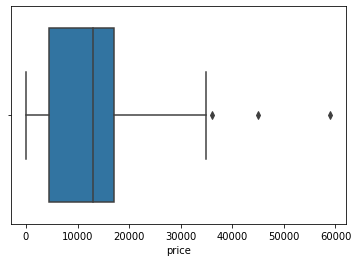

In [214]:
sns.boxplot(x=suv_ford['price']);

In [215]:
Q1=suv_ford['price'].quantile(0.25) # 1st quartile
Q3=suv_ford['price'].quantile(0.75)  # 3rd quartile
IQR=Q3-Q1
L= Q1-1.5*IQR  # lower limit
U = Q3+1.5*IQR

In [216]:
# check lower limits
suv_ford[suv_ford['price']<L]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age


In [217]:
# check Upper Limits
suv_ford[suv_ford['price']>U]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
236,suv,2015,Automatic,179,kuga,10000,10,Diesel,ford,No,35990,7
259,suv,2013,Automatic,364,Others,60000,9,Petrol,ford,No,45000,9
388,suv,1955,Manual,0,Others,70000,7,Petrol,ford,No,59000,67


In [218]:
suv_ford.drop(suv_ford[suv_ford['price']>U].index,axis=0,inplace=True)

In [219]:
suv_ford.shape

(534, 12)

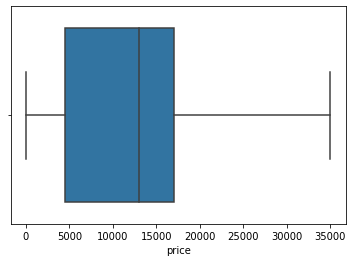

In [220]:
sns.boxplot(x=suv_ford['price']);

In [221]:
suv_ford

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Manual,163,kuga,30000,7,Diesel,ford,No,25950,8
1,suv,2012,Manual,140,kuga,90000,11,Diesel,ford,No,14900,10
2,suv,1998,Automatic,204,Others,150000,3,Petrol,ford,Yes,700,24
3,suv,2009,Manual,136,kuga,150000,9,Diesel,ford,No,10990,13
4,suv,2014,Automatic,163,kuga,90000,6,Diesel,ford,No,19999,8
...,...,...,...,...,...,...,...,...,...,...,...,...
532,suv,1998,Automatic,207,Others,150000,9,Petrol,ford,No,1799,24
533,suv,2004,Manual,150,Others,125000,12,Petrol,ford,No,4450,18
534,suv,1998,Automatic,147,Others,150000,6,Petrol,ford,No,2000,24
535,suv,2012,Manual,140,kuga,125000,3,Diesel,ford,No,16500,10


In [222]:
# feature Engineering

x = suv_ford.loc[:,['powerPS','kilometer','Age']]
y = suv_ford.price # for regression (linear regression )


In [223]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [224]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((373, 3), (161, 3), (373,), (161,))

In [225]:
model_lr = LinearRegression()
model_kn = KNeighborsRegressor(n_neighbors=100)
model_svr = SVR()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [226]:
# Fitting Process & predicting
rmodels = [model_lr,model_kn,model_svr,model_dtr,model_rfr]

for rgs in rmodels:
    rgs.fit(x_train,y_train)
    print(rgs)
    if rgs == model_lr:
        pred_lr = rgs.predict(x_test)
    elif rgs== model_kn:
        pred_kn = rgs.predict(x_test)     
    elif rgs == model_svr:
        pred_svr = rgs.predict(x_test)
    elif rgs == model_dtr:
        pred_dtr = rgs.predict(x_test)
    elif rgs == model_rfr:
        pred_rfr = rgs.predict(x_test)

LinearRegression()
KNeighborsRegressor(n_neighbors=100)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()


In [227]:
# check MSE, r2_score
from sklearn.metrics import mean_squared_error,r2_score

In [228]:
y_test

67      1300
535    16500
368    14899
491    12000
69     23400
       ...  
64     22500
265    18000
140    26500
92     15850
159     1000
Name: price, Length: 161, dtype: int64

In [229]:
pred_mod = ['pred_lr','pred_kn','pred_svr','pred_dtr','pred_rfr']

for y_pred in pred_mod:
    if y_pred == 'pred_lr':
      print("Accuracy for Linear Regression:",r2_score(y_test,pred_lr))
      print('Error for Linear Regression:',mean_squared_error(y_test,pred_lr))
      print('')
    elif y_pred == 'pred_kn':
      print("Accuracy for K Neighbors Regression:",r2_score(y_test,pred_kn))
      print('Error for K Neighbors Regression:',mean_squared_error(y_test,pred_kn))
      print('')
    elif y_pred == 'pred_svr':
      print(" Accuracy of SVR:",r2_score(y_test,pred_svr))
      print('Error for SVR:',mean_squared_error(y_test,pred_svr))
      print('')
    elif y_pred == 'pred_dtr':
      print(" Accuracy of Decision Tree:",r2_score(y_test,pred_dtr))
      print('Error for Decision Tree:',mean_squared_error(y_test,pred_dtr))
      print('')
    elif y_pred == 'pred_rfr':
      print(" Accuracy of Random Forest:",r2_score(y_test,pred_rfr))
      print('Error for Random FOrest:',mean_squared_error(y_test,pred_rfr))

Accuracy for Linear Regression: 0.6997780599961376
Error for Linear Regression: 17966223.991265457

Accuracy for K Neighbors Regression: 0.5943594396844367
Error for K Neighbors Regression: 24274805.38723478

 Accuracy of SVR: 0.011655364751272712
Error for SVR: 59145647.707212046

 Accuracy of Decision Tree: 0.7815842877797423
Error for Decision Tree: 13070682.33890715

 Accuracy of Random Forest: 0.8374187420389884
Error for Random FOrest: 9729373.200611744


Linear Regression Plot:


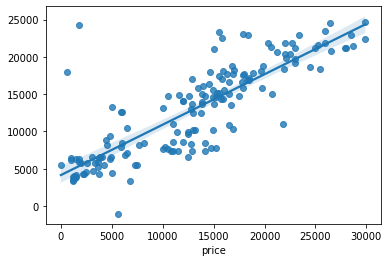

In [230]:
print('Linear Regression Plot:')
sns.regplot(y_test,pred_lr, logistic=False)
plt.show()

## Machine Learning Classification

In [231]:
suv_ford.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price,Age
0,suv,2014,Manual,163,kuga,30000,7,Diesel,ford,No,25950,8
1,suv,2012,Manual,140,kuga,90000,11,Diesel,ford,No,14900,10
2,suv,1998,Automatic,204,Others,150000,3,Petrol,ford,Yes,700,24
3,suv,2009,Manual,136,kuga,150000,9,Diesel,ford,No,10990,13
4,suv,2014,Automatic,163,kuga,90000,6,Diesel,ford,No,19999,8


In [232]:
suv_ford.shape

(534, 12)

In [233]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
suv_ford['fuelType'] = le.fit_transform(suv_ford['fuelType'])
suv_ford['gearbox'] = le.fit_transform(suv_ford['gearbox'])

In [234]:
# feature Engineering

c = suv_ford.loc[:,['powerPS','gearbox','kilometer','fuelType','Age']]

z = suv_ford.notRepairedDamage  # for classification (logistics )

In [235]:
c.shape

(534, 5)

In [236]:
z.shape

(534,)

In [237]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(c,z,test_size=0.30,random_state=12)

In [238]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((373, 5), (161, 5), (373,), (161,))

In [239]:
# model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [240]:
model_log = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=100)
model_svc = SVC()
model_dtc = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [241]:
# Fitting Process & predicting
cmodels = [model_log,model_knn,model_svc,model_dtc,model_rf]

for clf in cmodels:
    print(clf)
    clf.fit(x1_train,y1_train)
    if clf == model_log:
        predict_log = clf.predict(x1_test)
    elif clf== model_knn:
        predict_knn = clf.predict(x1_test)     
    elif clf == model_svc:
        predict_svc = clf.predict(x1_test)
    elif clf == model_dtc:
        predict_dtc = clf.predict(x1_test)
    elif clf == model_rf:
        predict_rf = clf.predict(x1_test)

LogisticRegression()
KNeighborsClassifier(n_neighbors=100)
SVC()
DecisionTreeClassifier()
RandomForestClassifier()


In [242]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [243]:
pred_mod = ['predict_log','predict_knn','predict_svc','predict_dtc','predict_rf']

for y_pred in pred_mod:
    if y_pred == 'predict_log':
        print("Confusion Matrix for Logistic Regression:\n",confusion_matrix(y1_test,predict_log))
        print("Accuracy Score for Logistic Regression:",accuracy_score(y1_test,predict_log))
        print('')
    elif y_pred == 'predict_knn':
        print("Confusion Matrix for KNN:\n",confusion_matrix(y1_test,predict_knn))
        print("Accuracy Score for KNN:",accuracy_score(y1_test,predict_knn))
        print('')
    elif y_pred == 'predict_svc':
        print("Confusion Matrix for SVC:\n",confusion_matrix(y1_test,predict_svc))
        print("Accuracy Score for SVC:",accuracy_score(y1_test,predict_svc))
        print('')
    elif y_pred == 'predict_dtc':
        print("Confusion Matrix for Decision Tree:\n",confusion_matrix(y1_test,predict_dtc))
        print("Accuracy Score for Decision Tree:",accuracy_score(y1_test,predict_dtc))
        print('')
    elif y_pred == 'predict_rf':
        print("Confusion Matrix for Random Forest:\n",confusion_matrix(y1_test,predict_rf))
        print("Accuracy Score for Random Forest:",accuracy_score(y1_test,predict_rf))

Confusion Matrix for Logistic Regression:
 [[144   2]
 [ 15   0]]
Accuracy Score for Logistic Regression: 0.8944099378881988

Confusion Matrix for KNN:
 [[146   0]
 [ 15   0]]
Accuracy Score for KNN: 0.906832298136646

Confusion Matrix for SVC:
 [[146   0]
 [ 15   0]]
Accuracy Score for SVC: 0.906832298136646

Confusion Matrix for Decision Tree:
 [[136  10]
 [  9   6]]
Accuracy Score for Decision Tree: 0.8819875776397516

Confusion Matrix for Random Forest:
 [[143   3]
 [ 10   5]]
Accuracy Score for Random Forest: 0.9192546583850931


In [244]:
for clfr in pred_mod:
    if clfr == 'predict_log':
        print("Classification Report for Logistic Regression:")
        print(classification_report(y1_test,predict_log),'\n')
    elif clfr == 'predict_knn':
        print("Classification Report for KNN:")
        print(classification_report(y1_test,predict_knn),'\n')
    elif clfr == 'predict_svc':
        print("Classification Report for SVC:")
        print(classification_report(y1_test,predict_svc),'\n')
    elif clfr == 'predict_dtc':
        print("Classification Report for Decision Tree:")
        print(classification_report(y1_test,predict_dtc),'\n')
    elif clfr == 'predict_rf':
        print("Classification Report for Random Forest:")
        print(classification_report(y1_test,predict_rf),'\n')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.91      0.99      0.94       146
         Yes       0.00      0.00      0.00        15

    accuracy                           0.89       161
   macro avg       0.45      0.49      0.47       161
weighted avg       0.82      0.89      0.86       161
 

Classification Report for KNN:
              precision    recall  f1-score   support

          No       0.91      1.00      0.95       146
         Yes       0.00      0.00      0.00        15

    accuracy                           0.91       161
   macro avg       0.45      0.50      0.48       161
weighted avg       0.82      0.91      0.86       161
 

Classification Report for SVC:
              precision    recall  f1-score   support

          No       0.91      1.00      0.95       146
         Yes       0.00      0.00      0.00        15

    accuracy                           0.91       161
   macro avg   